In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from labellines import labelLine, labelLines

%matplotlib inline
plt.style.use('seaborn')

# Initial Questions
##### 1. How does Iraqi life expectancy compare to other countries in Asia ?
##### 2. And vs the rest of the world? 
##### 3. What does Iraqi life expectancy look like over time?
##### 4. Are there any anomalies? Investigate
##### 5. Are there any good predictive factors for life expectancy available from the Gapminder data?

## Data Prep

In [2]:
# This fuction import_new_data() uses pandas read_csv() to import CSV files, transposes the files so that year values 
# become a column rather than the column headers. If a country name is passed into the function, it will filter the 
# CSV for that country and create a column name for the data based on the name of the file

def import_new_data(file_path, country=None):
    
    df = pd.read_csv(str(file_path),header=None)
    df = df.transpose()
    df = df.replace('country','year')
    
    headers = df.iloc[0] 
    df.columns = headers
    df = df[1:]
   
    col_name = file_path.split('/')[-1].split('.')[0]

    if country:
        df = df[['year','{}'.format(country)]]
        df = df.rename(columns={'{}'.format(country):'{}'.format(col_name)})
        
        df['year'] = pd.to_numeric(df['year'],downcast='integer')
        df.iloc[:,1] = pd.to_numeric(df.iloc[:,1],downcast='float')
        
        
        
        return df
    else:
        return df


# I'll use this function later on, but for now I'll use the df in it's original shape.

In [3]:
df = pd.read_csv('life_expectancy_years.csv')

# I'll look at global life expectancy from 1940 - 2020

#drop columns up to the year 1940
cols_to_drop1 = list(range(1,141))
df.drop(df.columns[cols_to_drop1], axis=1, inplace = True)

#drop columns beyond the year 2020
cols_to_drop2 = list(range(82,162))
df.drop(df.columns[cols_to_drop2], axis=1, inplace = True)
df.head()

,country,1940,1941,1942,1943,1944,1945,1946,1947,1948,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,31.9,31.9,32.0,32.1,32.1,32.2,32.2,32.3,32.4,...,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.7,64.1,64.4
1,Albania,42.0,41.5,40.0,37.0,34.0,47.0,50.0,51.5,52.4,...,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.3,78.5,78.6
2,Algeria,37.3,35.6,34.9,30.2,35.7,33.5,35.7,39.1,42.3,...,76.5,76.8,76.9,77.0,77.1,77.4,77.7,77.9,78.1,78.3
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.4,82.4,82.5,82.5,82.6,82.7,82.7,NaN,NaN,NaN
4,Angola,31.8,32.1,32.5,32.8,33.1,33.5,33.8,34.1,34.5,...,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.6,65.0,65.4


In [4]:
#Compute the mean for each country and assign to new column in df
df['mean'] = df.mean(axis=1)

In [5]:
df.head()

,country,1940,1941,1942,1943,1944,1945,1946,1947,1948,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,mean
0,Afghanistan,31.9,31.9,32.0,32.1,32.1,32.2,32.2,32.3,32.4,...,60.8,61.3,61.2,61.2,61.2,63.4,63.7,64.1,64.4,46.895062
1,Albania,42.0,41.5,40.0,37.0,34.0,47.0,50.0,51.5,52.4,...,77.8,77.9,77.9,78.0,78.1,78.2,78.3,78.5,78.6,67.217284
2,Algeria,37.3,35.6,34.9,30.2,35.7,33.5,35.7,39.1,42.3,...,76.8,76.9,77.0,77.1,77.4,77.7,77.9,78.1,78.3,61.983951
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.4,82.5,82.5,82.6,82.7,82.7,NaN,NaN,NaN,79.770833
4,Angola,31.8,32.1,32.5,32.8,33.1,33.5,33.8,34.1,34.5,...,61.3,61.9,62.8,63.3,63.8,64.2,64.6,65.0,65.4,47.227160


## 1. How does Iraqi life expectancy compare to other countries in Asia?

In [6]:
asia_list = ['China', 'India', 'Indonesia', 'Pakistan', 'Bangladesh', 'Japan', 'Philippines', 'Vietnam', 'Turkey', 
             'Iran', 'Thailand','Myanmar', 'South Korea','Iraq','Afghanistan','Saudi Arabia','Uzbekistan','Malaysia',
             'Yemen','Nepal','North Korea','Sri Lanka','Kazakhstan','Syria','Cambodia','Jordan','Azerbaijan',
             'United Arab Emirates','Tajikistan','Israel','Laos','Lebanon','Kyrgyzstan','Turkmenistan','Singapore',
             'Oman','Palestine','Kuwait','Georgia'',Mongolia','Armenia','Qatar','Bahrain','Timor-Leste',
             'Cyprus','Bhutan','Maldives','Brunei']

#select countries from df if in asia_list
df_asia = df[df['country'].isin(asia_list)]

#add boolean column 'is_iraq' for highlighting Iraq in plot
df_asia['is_iraq'] = df_asia['country'] == 'Iraq'

<ipython-input-6-7c0d36b4100b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['is_iraq'] = df_asia['country'] == 'Iraq'


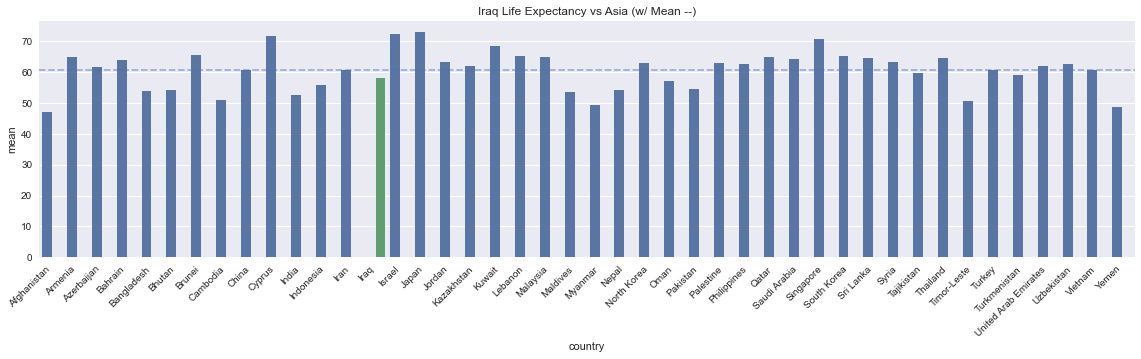

In [7]:
#Seaborn barplot with Iraq highlighted
mean_le = sns.catplot(
    data=df_asia,
    x='country',
    y='mean',
    kind='bar',
    height=4, 
    aspect=4,
    hue='is_iraq',
    legend=False)

plt.title('Iraq Life Expectancy vs Asia (w/ Mean --)')

#set rotation and alignment of xtick labels
mean_le.set_xticklabels(rotation=45,horizontalalignment = 'right')

#plot an average line for life expectancy in df_asia
plt.axhline(y=df_asia['mean'].mean(), xmin=0, xmax=1,label='Asia Average',ls = '--',alpha=0.5);

#### The plot above shows that for 1940-2020, mean Iraqi life expectancy is just slightly below that of other countries in Asia

## Question 2. And vs the rest of the world?

In [8]:
df2 = import_new_data('life_expectancy_years.csv')
df2 = df2.query('year <= 2020 & year >=1940')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 141 to 221
Columns: 188 entries, year to Zimbabwe
dtypes: object(188)
memory usage: 119.6+ KB


In [10]:
#get the mean of each country, then the mean of the means to get the global mean for the period in df2
df2.loc['mean'] = df2.mean()
df2['mean'] = df2.iloc[:,1:].mean(axis=1)
df2.tail()

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,mean
218,2017,63.4,78.2,77.7,82.7,64.2,77,76.7,75.6,82.4,...,78.6,77,70.3,64.7,75.3,74.5,68.1,63.2,61.4,72.737433
219,2018,63.7,78.3,77.9,NaN,64.6,77.2,76.8,75.8,82.5,...,78.6,77.2,70.5,64.9,75.2,74.6,68.1,63.7,61.7,72.969022
220,2019,64.1,78.5,78.1,NaN,65,77.3,77,75.9,82.7,...,78.6,77.3,70.7,65,75.1,74.7,68.1,64,62,73.184783
221,2020,64.4,78.6,78.3,NaN,65.4,77.4,77.1,76,82.8,...,78.6,77.5,70.8,65.1,75.1,74.8,68.2,64.3,62.3,73.391304
mean,1980,46.8951,67.2173,61.984,79.7708,47.2272,68.6432,68.9457,64.8531,74.863,...,73.1815,70.1593,62.5358,56.3099,66.0259,60.5025,48.5778,50.4469,53.0037,61.149643


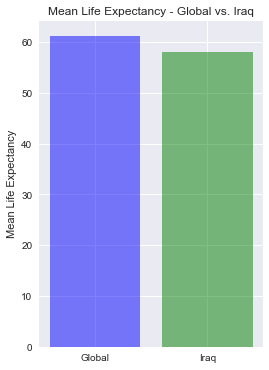

In [11]:
global_mean = df2.loc['mean']['mean']
iraq_mean = df2.loc['mean']['Iraq']

locations = [1,2]
heights = [global_mean,iraq_mean]
colors = ['blue','green']
labels = ['Global','Iraq']

figure(figsize=(4,6))
plt.bar(locations, heights, color=colors,tick_label=labels,alpha=.5)
plt.title('Mean Life Expectancy - Global vs. Iraq')
plt.ylabel('Mean Life Expectancy');


### Question 3. What does Iraqi life expectancy look like over time?

In [18]:
df_iraq = import_new_data('life_expectancy_years.csv','Iraq')
df_iraq = df_iraq.query('year >= 1940 & year <= 2020')

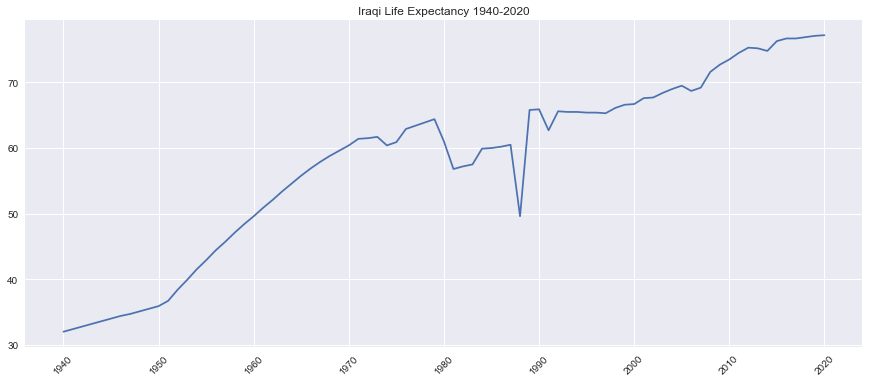

In [32]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df_iraq['year'],df_iraq['life_expectancy_years'])
plt.xticks(rotation = 45)
plt.title('Iraqi Life Expectancy 1940-2020');

## Question 4. Are there any anomalies? Investigate

#### We can see a clear disturbance in the trend beginning just prior to 1980 until 1991 - what happened here?
- The [Iran-Iraq war](https://en.wikipedia.org/wiki/Iran%E2%80%93Iraq_War) appears to be the major event that triggered this decline

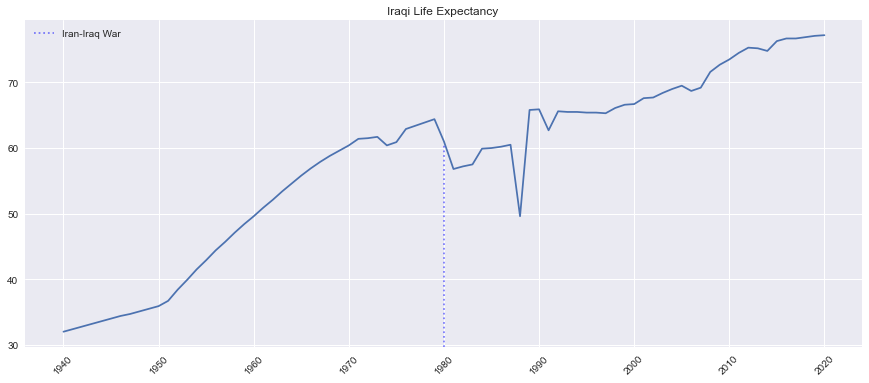

In [45]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df_iraq['year'],df_iraq['life_expectancy_years'])
plt.xticks(rotation = 45)
plt.title('Iraqi Life Expectancy ')

#plot vertical line marking event
plt.axvline(x=1980,ymax=.62,linestyle=':',color='b',label='Iran-Iraq War',alpha=0.5)

plt.legend();

#### What was the scale of the impact?
- From what we see below, Iraqi life expectancy dropped nearly 15 years over the course of the war

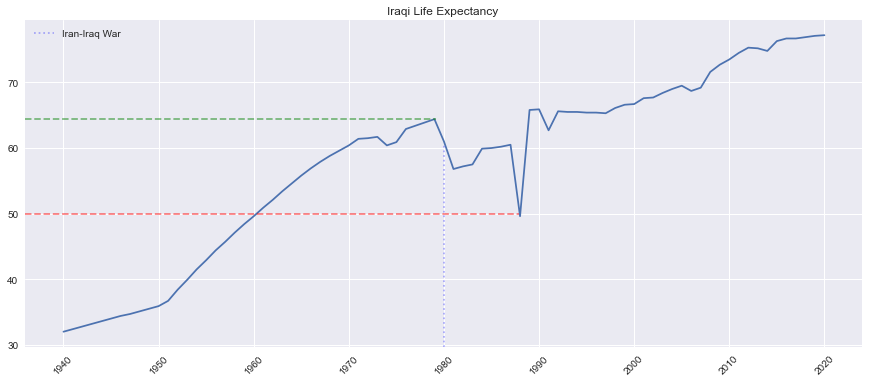

In [49]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df_iraq['year'],df_iraq['life_expectancy_years'])
plt.xticks(rotation = 45)
plt.title('Iraqi Life Expectancy ')

#plot vertical line marking event
plt.axvline(x=1980,ymax=.62,linestyle=':',color='b',label='Iran-Iraq War',alpha=0.3)

#plot horizontal line to meet y-axis
plt.axhline(y=64.5,xmax=.49,linestyle='--',alpha=0.5,color='g')
plt.axhline(y=50,xmax=.59,linestyle='--',alpha=0.5,color='r')

plt.legend();

#### Now that the anomalous data has been explained, what about the overall trend? I'll plot a 10-year moving average to visualise

In [50]:
#create moving average with window of 10 (years)
df_iraq['5yr_ma'] = df_iraq['life_expectancy_years'].rolling(window=10,min_periods=None).mean()

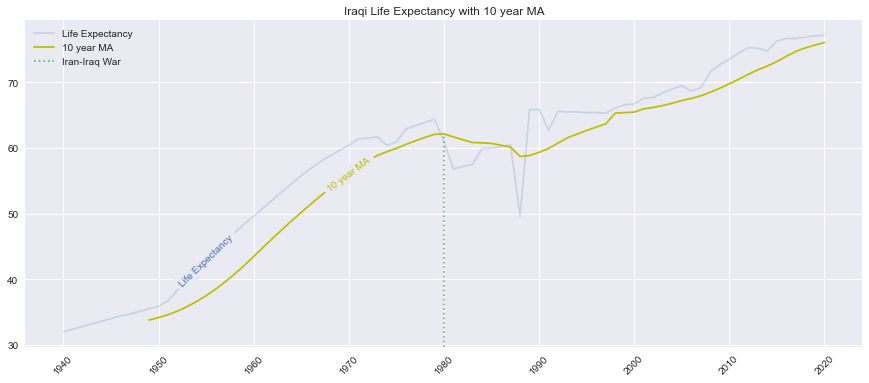

In [52]:
#plot MA overlayed with original data
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df_iraq['year'],df_iraq['life_expectancy_years'],label='Life Expectancy',alpha=0.2)
ax.plot(df_iraq['year'],df_iraq['5yr_ma'], color='y',label='10 year MA')

#plot formatting
plt.xticks(rotation = 45)
plt.title('Iraqi Life Expectancy with 10 year MA')

plt.axvline(x=1980,ymax=.65,linestyle=':',color='g',label='Iran-Iraq War',alpha=0.5)
plt.legend()

#adding labels to the plotlines
xvals = [1955,1970]
labelLines(plt.gca().get_lines(), zorder=2.5,xvals=xvals);

#### Even the 10 year moving average curve 1980+ shows a significant deviation from the growth prior